<a href="https://colab.research.google.com/github/RafMiranda/Previs-o_da-_a-es-_da-_AMZN/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão do preço das ações da Amazon (AMZN) usando Prophet

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
df= pd.read_csv("AMZN.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-29,107.379997,110.989998,106.910004,108.919998,108.919998,66375300
1,2022-06-30,108.110001,108.180000,102.519997,106.209999,106.209999,97679400
2,2022-07-01,106.290001,109.750000,105.849998,109.559998,109.559998,73021200
3,2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700
4,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
...,...,...,...,...,...,...,...
247,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200
248,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300
249,2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000
250,2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,108.923691,110.675080,107.212560,108.997480,108.997480,6.745947e+07
std,15.543737,15.746203,15.486335,15.600768,15.600768,2.556272e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.161045e+07
25%,96.077501,97.642498,94.232499,96.289999,96.289999,5.195025e+07
50%,105.370002,107.470001,104.215000,105.745003,105.745003,6.095135e+07
75%,120.939997,122.939999,119.252499,121.102497,121.102497,7.334678e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


In [7]:
px.area(df,  x="Date", y="Close")

In [8]:
px.line(df,  x="Date", y="Close")

In [9]:
px.area(df,  x="Date", y="Volume")

In [10]:
px.bar(df, y="Volume")

In [11]:
px.box(df, y="Close")

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-29,107.379997,110.989998,106.910004,108.919998,108.919998,66375300
1,2022-06-30,108.110001,108.180000,102.519997,106.209999,106.209999,97679400
2,2022-07-01,106.290001,109.750000,105.849998,109.559998,109.559998,73021200
3,2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700
4,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
...,...,...,...,...,...,...,...
247,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200
248,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300
249,2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000
250,2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500


In [14]:
columns=['Date', "Close"]
ndf= pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2022-06-29,108.919998
1,2022-06-30,106.209999
2,2022-07-01,109.559998
3,2022-07-05,113.500000
4,2022-07-06,114.330002
...,...,...
247,2023-06-23,129.330002
248,2023-06-26,127.330002
249,2023-06-27,129.179993
250,2023-06-28,129.039993


In [16]:
prophet_df= ndf.rename(columns={'Date':'ds', 'Close':'y'})
prophet_df

,ds,y
0,2022-06-29,108.919998
1,2022-06-30,106.209999
2,2022-07-01,109.559998
3,2022-07-05,113.500000
4,2022-07-06,114.330002
...,...,...
247,2023-06-23,129.330002
248,2023-06-26,127.330002
249,2023-06-27,129.179993
250,2023-06-28,129.039993


In [ ]:
m=Prophet()
m.fit(prophet_df)

In [19]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-29,110.051186,104.030148,117.331253,110.051186,110.051186,0.266479,0.266479,0.266479,0.266479,0.266479,0.266479,0.0,0.0,0.0,110.317666
1,2022-06-30,110.622203,105.327759,118.051170,110.622203,110.622203,0.717224,0.717224,0.717224,0.717224,0.717224,0.717224,0.0,0.0,0.0,111.339427
2,2022-07-01,111.193219,105.224431,117.967274,111.193219,111.193219,0.491194,0.491194,0.491194,0.491194,0.491194,0.491194,0.0,0.0,0.0,111.684412
3,2022-07-05,113.477284,107.016307,119.849430,113.477284,113.477284,-0.031568,-0.031568,-0.031568,-0.031568,-0.031568,-0.031568,0.0,0.0,0.0,113.445716
4,2022-07-06,114.048300,108.001296,120.224809,114.048300,114.048300,0.266479,0.266479,0.266479,0.266479,0.266479,0.266479,0.0,0.0,0.0,114.314780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-07-25,138.355060,131.542576,144.492911,136.306402,140.279322,-0.031568,-0.031568,-0.031568,-0.031568,-0.031568,-0.031568,0.0,0.0,0.0,138.323492
278,2023-07-26,138.712801,132.279502,145.844654,136.562225,140.713695,0.266479,0.266479,0.266479,0.266479,0.266479,0.266479,0.0,0.0,0.0,138.979281
279,2023-07-27,139.070542,132.882211,146.227658,136.785720,141.267601,0.717224,0.717224,0.717224,0.717224,0.717224,0.717224,0.0,0.0,0.0,139.787767
280,2023-07-28,139.428283,133.002564,146.786692,137.041947,141.799075,0.491194,0.491194,0.491194,0.491194,0.491194,0.491194,0.0,0.0,0.0,139.919477


In [20]:
px.line(forecast, x='ds', y='yhat')

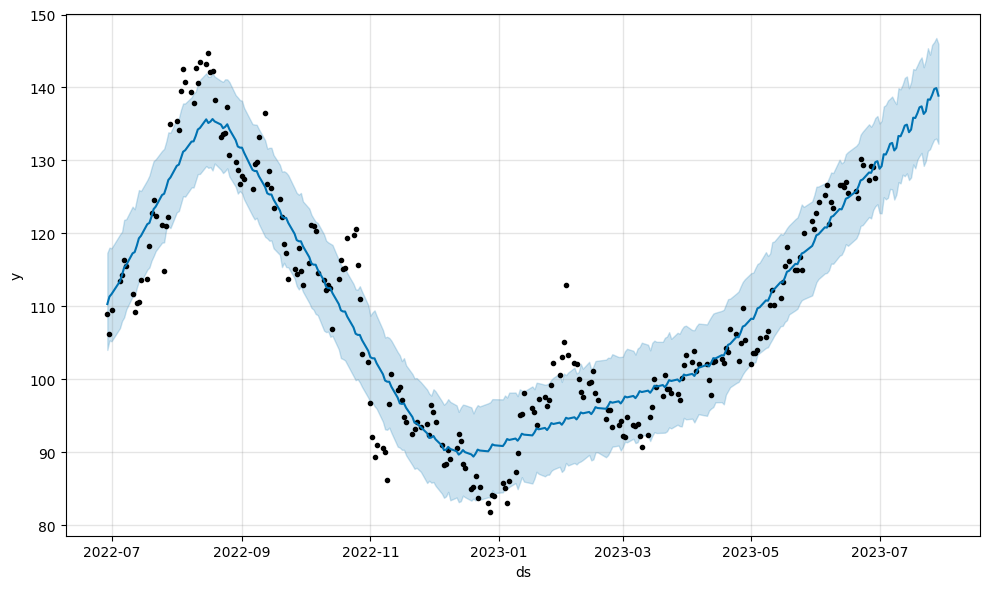

In [21]:
figure= m.plot(forecast,xlabel='ds',ylabel='y')

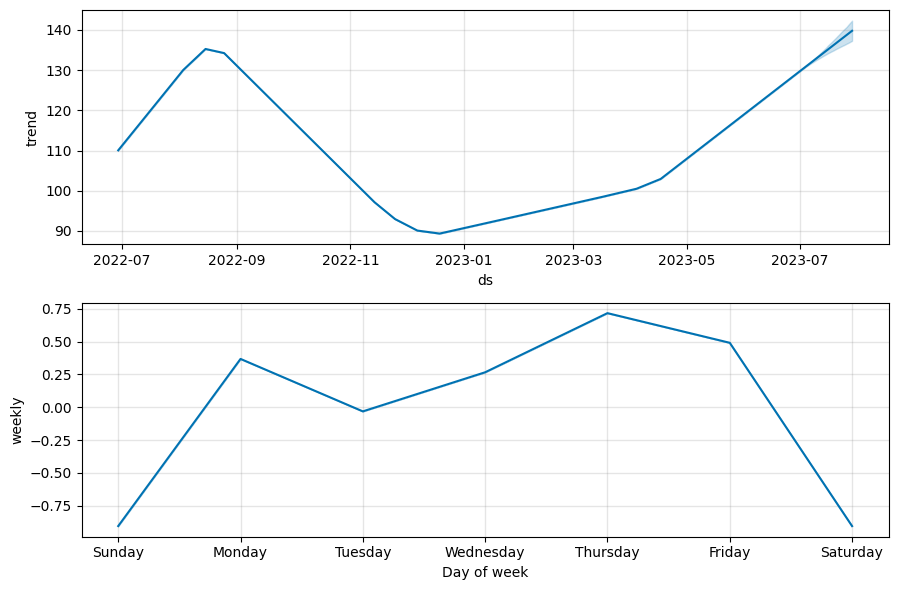

In [22]:
figure2= m.plot_components(forecast)

In [23]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>